In [84]:
from libpgm.graphskeleton import GraphSkeleton
from libpgm.nodedata import NodeData
from libpgm.discretebayesiannetwork import DiscreteBayesianNetwork
from libpgm.tablecpdfactorization import TableCPDFactorization
import pandas as pd
import numpy as np

In [2]:
def getTableCPD():
    nd = NodeData()
    skel = GraphSkeleton()
    jsonpath="student.txt"
    nd.load(jsonpath)
    skel.load(jsonpath)
    # load bayesian network
    bn = DiscreteBayesianNetwork(skel, nd)
    tablecpd=TableCPDFactorization(bn)
    return tablecpd

In [10]:
def getBN():
    nd = NodeData()
    skel = GraphSkeleton()
    jsonpath="student.txt"
    nd.load(jsonpath)
    skel.load(jsonpath)
    # load bayesian network
    bn = DiscreteBayesianNetwork(skel, nd)
    return bn

In [11]:
bn = getBN()

In [12]:
bn.V

[u'Difficulty', u'Intelligence', u'Grade', u'SAT', u'Letter']

In [13]:
bn.E

[[u'Intelligence', u'Grade'],
 [u'Difficulty', u'Grade'],
 [u'Intelligence', u'SAT'],
 [u'Grade', u'Letter']]

In [16]:
bn.Vdata

{u'Difficulty': {u'children': [u'Grade'],
  u'cprob': [0.6, 0.4],
  u'numoutcomes': 2,
  u'ord': 0,
  u'parents': None,
  u'vals': [u'easy', u'hard']},
 u'Grade': {u'children': [u'Letter'],
  u'cprob': {u"['easy', 'high']": [0.9, 0.08, 0.02],
   u"['easy', 'low']": [0.3, 0.4, 0.3],
   u"['hard', 'high']": [0.5, 0.3, 0.2],
   u"['hard', 'low']": [0.05, 0.25, 0.7]},
  u'numoutcomes': 3,
  u'ord': 2,
  u'parents': [u'Difficulty', u'Intelligence'],
  u'vals': [u'A', u'B', u'C']},
 u'Intelligence': {u'children': [u'SAT', u'Grade'],
  u'cprob': [0.7, 0.3],
  u'numoutcomes': 2,
  u'ord': 1,
  u'parents': None,
  u'vals': [u'low', u'high']},
 u'Letter': {u'children': None,
  u'cprob': {u"['A']": [0.1, 0.9],
   u"['B']": [0.4, 0.6],
   u"['C']": [0.99, 0.01]},
  u'numoutcomes': 2,
  u'ord': 4,
  u'parents': [u'Grade'],
  u'vals': [u'weak', u'strong']},
 u'SAT': {u'children': None,
  u'cprob': {u"['high']": [0.2, 0.8], u"['low']": [0.95, 0.05]},
  u'numoutcomes': 2,
  u'ord': 3,
  u'parents': [u

In [17]:
bn.V

[u'Difficulty', u'Intelligence', u'Grade', u'SAT', u'Letter']

In [49]:
aSample = bn.randomsample(1)[0]

In [50]:
aSample

{u'Difficulty': u'hard',
 u'Grade': u'C',
 u'Intelligence': u'low',
 u'Letter': u'weak',
 u'SAT': u'lowscore'}

In [32]:
varValEncodings = {variable: {v: i for i,v in enumerate(bn.Vdata[variable]['vals'])} for variable in bn.Vdata.keys()}

In [33]:
varValEncodings

{u'Difficulty': {u'easy': 0, u'hard': 1},
 u'Grade': {u'A': 0, u'B': 1, u'C': 2},
 u'Intelligence': {u'high': 1, u'low': 0},
 u'Letter': {u'strong': 1, u'weak': 0},
 u'SAT': {u'highscore': 1, u'lowscore': 0}}

In [40]:
def encodedSample(aSample, varValEncodings, bn):
    return [varValEncodings[aVar][aSample[aVar]] for aVar in bn.V]
    

In [51]:
encodedSample(aSample, varValEncodings, bn)

[1, 0, 2, 0, 0]

In [70]:
def encodedSamples(numSamples, bn):
    varValEncodings = {variable: {v: i for i,v in enumerate(bn.Vdata[variable]['vals'])} for variable in bn.V}
    samples = bn.randomsample(numSamples)
    return pd.DataFrame([encodedSample(aSample, varValEncodings, bn) for aSample in samples], columns=bn.V)

In [71]:
lotsaSamples = encodedSamples(100000, bn)

In [80]:
lotsaSamples[[variable for variable in bn.V]].head(10)

,Difficulty,Intelligence,Grade,SAT,Letter
0,0,0,1,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,2,0,0
4,1,1,1,1,0
5,1,1,0,1,1
6,0,1,0,1,1
7,0,0,2,0,0
8,1,1,1,1,1
9,1,0,2,0,0


In [81]:
%%bash
head -10 student_100kSamples.csv

0,0,1,0,1
0,0,0,0,1
0,0,0,0,1
0,0,2,0,0
1,1,1,1,0
1,1,0,1,1
0,1,0,1,1
0,0,2,0,0
1,1,1,1,1
1,0,2,0,0


In [77]:
lotsaSamples[[variable for variable in bn.V]].to_csv('student_100kSamples.csv', index=False, header=False)

In [96]:
nvals=np.array([bn.Vdata[variable]['numoutcomes'] for variable in bn.V], dtype=np.int8)

In [109]:
np.set_printoptions(suppress=True)
np.savetxt('student_nvals.csv', nvals.astype(int),delimiter=',', fmt='%i',)

In [110]:
%%bash
cat student_nvals.csv

2
2
3
2
2


In [111]:
import graphviz as gv

In [112]:
vertexEncodings = {v: i for i,v in enumerate(bn.V)}

In [113]:
vertexEncodings

{u'Difficulty': 0, u'Grade': 2, u'Intelligence': 1, u'Letter': 4, u'SAT': 3}

In [115]:
edgesEncoded = [[vertexEncodings[edge[0]],vertexEncodings[edge[1]] ]for edge in bn.E]

In [116]:
edgesEncoded

[[1, 2], [0, 2], [1, 3], [2, 4]]

In [117]:
g1 = gv.Graph(format='svg')

In [118]:
bn.V, bn.E

([u'Difficulty', u'Intelligence', u'Grade', u'SAT', u'Letter'],
 [[u'Intelligence', u'Grade'],
  [u'Difficulty', u'Grade'],
  [u'Intelligence', u'SAT'],
  [u'Grade', u'Letter']])

In [119]:
g1.node('Difficulty')

In [120]:
g1.node('Grade')

In [121]:
g1.edge('Difficulty', 'Grade')

In [122]:
print(g1.source)

graph {
	Difficulty
	Grade
		Difficulty -- Grade
}


In [123]:
from graphviz import Digraph

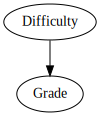

In [125]:
dot = Digraph(comment='Student Network')
for v,i in vertexEncodings.items():
    dot.note(chr())

dot.node('A', 'Difficulty')
dot.node('B', 'Grade')
dot.edges(['AB'])
dot

In [134]:
chr(97).upper()

'A'